In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import copy
import random

In [2]:
def set_weights(patterns, weights):
    p = weights.shape[0]
    weights_copy = copy.deepcopy(weights)
    
    for i in range(p):
        for j in range(p):
            if i == j:
                weights_copy[i, j] = 0
            else:
                for p_num in range(patterns.shape[1]):
                    weights_copy[i, j] += (1/p)*patterns[i, p_num]*patterns[j, p_num]
    
    return weights_copy
                    

def iterate_network(test_input, weights, max_iter):
    p = weights.shape[0]
    
    x_cur = copy.deepcopy(test_input)
    x_new = np.zeros(test_input.shape)
    
    for iteration in range(max_iter):
        for i in range(p):
            temp_sum = 0
            for j in range(p):
                temp_sum += weights[i, j]*x_cur[j]
                
            x_new[i] = np.sign(temp_sum)
        
        comparison = (x_new == x_cur)
        if comparison.all():
            break
        
        x_cur = x_new
    
    return x_cur
        
    
def add_noise(patterns, num_pixels):
    noisy_patterns = copy.deepcopy(patterns)
    indices = range(patterns.shape[0])
    
    for p_num in range(patterns.shape[1]):
        shuf_ind = random.sample(indices, len(indices))
        
        for i in range(num_pixels):
            if patterns[shuf_ind[i], p_num] == 1:
                noisy_patterns[shuf_ind[i], p_num] = -1
            else:
                noisy_patterns[shuf_ind[i], p_num] = 1
    
    return noisy_patterns

In [3]:
pattern_0 = np.array([[-1,1,1,1,-1],
                      [1,-1,-1,-1,1],
                      [1,-1,-1,-1,1],
                      [1,-1,-1,-1,1],
                      [1,-1,-1,-1,1],
                      [-1,1,1,1,-1]])
pattern_0_flat = np.reshape(pattern_0, (30,1))


pattern_1 = np.array([[-1,1,1,-1,-1],
                      [-1,-1,1,-1,-1],
                      [-1,-1,1,-1,-1],
                      [-1,-1,1,-1,-1],
                      [-1,-1,1,-1,-1],
                      [-1,-1,1,-1,-1]])
pattern_1_flat = np.reshape(pattern_1, (30,1))


pattern_2 = np.array([[1,1,1,-1,-1],
                      [-1,-1,-1,1,-1],
                      [-1,-1,-1,1,-1],
                      [-1,1,1,-1,-1],
                      [-1,1,-1,-1,-1],
                      [-1,1,1,1,1]])
pattern_2_flat = np.reshape(pattern_2, (30,1))


pattern_3 = np.array([[-1,1,1,1,-1,],
                      [-1,-1,-1,-1,1],
                      [-1,-1,1,1,1],
                      [-1,-1,-1,-1,1],
                      [-1,1,1,1,-1],
                      [-1,-1,-1,-1,-1]])
pattern_3_flat = np.reshape(pattern_3, (30,1))


pattern_4 = np.array([[1,-1,-1,1,-1],
                      [1,-1,-1,1,-1],
                      [1,-1,-1,1,-1],
                      [1,1,1,1,1],
                      [-1,-1,-1,1,-1],
                      [-1,-1,-1,1,-1]])
pattern_4_flat = np.reshape(pattern_4, (30,1))


pattern_5 = np.array([[1,1,1,1,1],
                      [1,-1,-1,-1,-1],
                      [1,1,1,1,-1],
                      [-1,-1,-1,1,-1],
                      [-1,-1,-1,1,-1],
                      [1,1,1,1,-1]])
pattern_5_flat = np.reshape(pattern_5, (30,1))


pattern_6 = np.array([[1,-1,-1,-1,-1],
                      [1,-1,-1,-1,-1],
                      [1,1,1,1,1],
                      [1,-1,-1,-1,1],
                      [1,-1,-1,-1,1],
                      [1,1,1,1,1]])
pattern_6_flat = np.reshape(pattern_6, (30,1))

Text(0.5, 1.0, 'Pattern for digit 0')

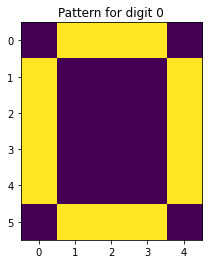

In [4]:
plt.imshow(pattern_0)
plt.title('Pattern for digit 0')

Text(0.5, 1.0, 'Pattern for digit 1')

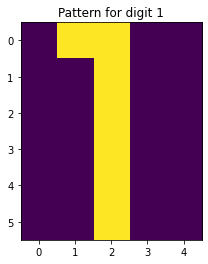

In [5]:
plt.imshow(pattern_1)
plt.title('Pattern for digit 1')

Text(0.5, 1.0, 'Pattern for digit 2')

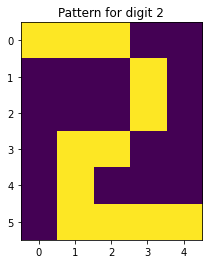

In [6]:
plt.imshow(pattern_2)
plt.title('Pattern for digit 2')

Text(0.5, 1.0, 'Pattern for digit 3')

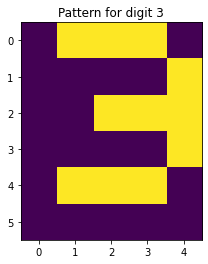

In [7]:
plt.imshow(pattern_3)
plt.title('Pattern for digit 3')

Text(0.5, 1.0, 'Pattern for digit 4')

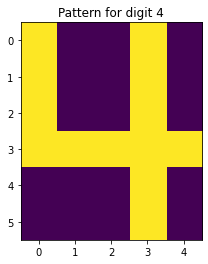

In [8]:
plt.imshow(pattern_4)
plt.title('Pattern for digit 4')

Text(0.5, 1.0, 'Pattern for digit 5')

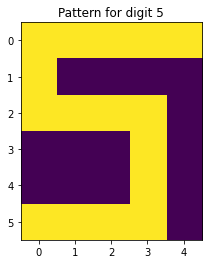

In [9]:
plt.imshow(pattern_5)
plt.title('Pattern for digit 5')

Text(0.5, 1.0, 'Pattern for digit 6')

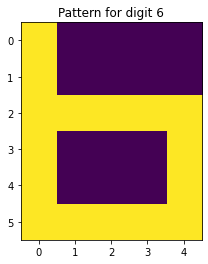

In [10]:
plt.imshow(pattern_6)
plt.title('Pattern for digit 6')

In [11]:
patterns_01 = np.hstack((pattern_0_flat, pattern_1_flat))

patterns_012 = np.hstack((patterns_01, pattern_1_flat))

patterns_0123456 = np.hstack((patterns_012, pattern_3_flat))
patterns_0123456 = np.hstack((patterns_0123456, pattern_4_flat))
patterns_0123456 = np.hstack((patterns_0123456, pattern_5_flat))
patterns_0123456 = np.hstack((patterns_0123456, pattern_6_flat))

In [12]:
blank_weights = np.zeros((30,30))
max_iter = 10_000

weights_01 = set_weights(patterns_01, blank_weights)
weights_012 = set_weights(patterns_012, blank_weights)
weights_0123456 = set_weights(patterns_0123456, blank_weights)

noise2_arr = []
noise4_arr = []
noise6_arr = []

In [13]:
for i in range(10):
    noise2_temp_arr = []
    patterns_01_noise2 = add_noise(patterns_01, 2)
    patterns_012_noise2 = add_noise(patterns_012, 2)
    patterns_0123456_noise2 = add_noise(patterns_0123456, 2)
    noise2_temp_arr.append(iterate_network(patterns_01_noise2, weights_01, max_iter))
    noise2_temp_arr.append(iterate_network(patterns_012_noise2, weights_012, max_iter))
    noise2_temp_arr.append(iterate_network(patterns_0123456_noise2, weights_0123456, max_iter))
    noise2_arr.append(noise2_temp_arr)

    noise4_temp_arr = []
    patterns_01_noise4 = add_noise(patterns_01, 4)
    patterns_012_noise4 = add_noise(patterns_012, 4)
    patterns_0123456_noise4 = add_noise(patterns_0123456, 4)
    noise4_temp_arr.append(iterate_network(patterns_01_noise4, weights_01, max_iter))
    noise4_temp_arr.append(iterate_network(patterns_012_noise4, weights_012, max_iter))
    noise4_temp_arr.append(iterate_network(patterns_0123456_noise4, weights_0123456, max_iter))
    noise4_arr.append(noise4_temp_arr)

    noise6_temp_arr = []
    patterns_01_noise6 = add_noise(patterns_01, 6)
    patterns_012_noise6 = add_noise(patterns_012, 6)
    patterns_0123456_noise6 = add_noise(patterns_0123456, 6)
    noise6_temp_arr.append(iterate_network(patterns_01_noise6, weights_01, max_iter))
    noise6_temp_arr.append(iterate_network(patterns_012_noise6, weights_012, max_iter))
    noise6_temp_arr.append(iterate_network(patterns_0123456_noise6, weights_0123456, max_iter))
    noise6_arr.append(noise6_temp_arr)

Text(0, 0.5, 'Error %')

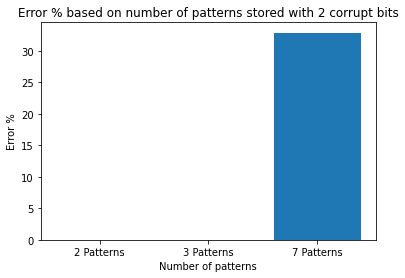

In [14]:
noise2_2pat = 0
noise2_3pat = 0
noise2_7pat = 0

for i in range(10):
    for x in range(noise2_arr[i][0].shape[1]):
        if (noise2_arr[i][0][:,x] == patterns_01[:,x]).all():
            noise2_2pat += 1
    for y in range(noise2_arr[i][1].shape[1]):
        if (noise2_arr[i][1][:,y] == patterns_012[:,y]).all():
            noise2_3pat += 1
    for z in range(noise2_arr[i][2].shape[1]):
        if (noise2_arr[i][2][:,z] == patterns_0123456[:,z]).all():
            noise2_7pat += 1
        
noise2_2pat_err = ((20-noise2_2pat)/20)*100
noise2_3pat_err = ((30-noise2_3pat)/30)*100
noise2_7pat_err = ((70-noise2_7pat)/70)*100

noise_2_err = [noise2_2pat_err, noise2_3pat_err, noise2_7pat_err]

patterns_stored = ['2 Patterns', '3 Patterns', '7 Patterns']

plt.bar(patterns_stored, noise_2_err)
plt.title('Error % based on number of patterns stored with 2 corrupt bits')
plt.xlabel('Number of patterns')
plt.ylabel('Error %')

Text(0, 0.5, 'Error %')

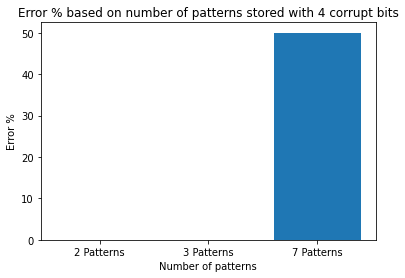

In [15]:
noise4_2pat = 0
noise4_3pat = 0
noise4_7pat = 0

for i in range(10):
    for x in range(noise4_arr[i][0].shape[1]):
        if (noise4_arr[i][0][:,x] == patterns_01[:,x]).all():
            noise4_2pat += 1
    for y in range(noise4_arr[i][1].shape[1]):
        if (noise4_arr[i][1][:,y] == patterns_012[:,y]).all():
            noise4_3pat += 1
    for z in range(noise4_arr[i][2].shape[1]):
        if (noise4_arr[i][2][:,z] == patterns_0123456[:,z]).all():
            noise4_7pat += 1
        
noise4_2pat_err = ((20-noise4_2pat)/20)*100
noise4_3pat_err = ((30-noise4_3pat)/30)*100
noise4_7pat_err = ((70-noise4_7pat)/70)*100

noise_4_err = [noise4_2pat_err, noise4_3pat_err, noise4_7pat_err]

patterns_stored = ['2 Patterns', '3 Patterns', '7 Patterns']

plt.bar(patterns_stored, noise_4_err)
plt.title('Error % based on number of patterns stored with 4 corrupt bits')
plt.xlabel('Number of patterns')
plt.ylabel('Error %')

Text(0, 0.5, 'Error %')

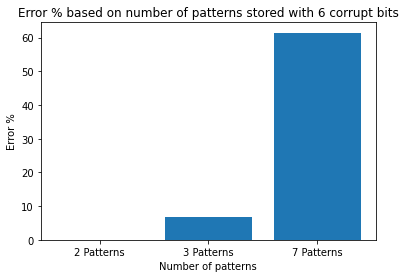

In [16]:
noise6_2pat = 0
noise6_3pat = 0
noise6_7pat = 0

for i in range(10):
    for x in range(noise6_arr[i][0].shape[1]):
        if (noise6_arr[i][0][:,x] == patterns_01[:,x]).all():
            noise6_2pat += 1
    for y in range(noise6_arr[i][1].shape[1]):
        if (noise6_arr[i][1][:,y] == patterns_012[:,y]).all():
            noise6_3pat += 1
    for z in range(noise6_arr[i][2].shape[1]):
        if (noise6_arr[i][2][:,z] == patterns_0123456[:,z]).all():
            noise6_7pat += 1
        
noise6_2pat_err = ((20-noise6_2pat)/20)*100
noise6_3pat_err = ((30-noise6_3pat)/30)*100
noise6_7pat_err = ((70-noise6_7pat)/70)*100

noise_6_err = [noise6_2pat_err, noise6_3pat_err, noise6_7pat_err]

patterns_stored = ['2 Patterns', '3 Patterns', '7 Patterns']

plt.bar(patterns_stored, noise_6_err)
plt.title('Error % based on number of patterns stored with 6 corrupt bits')
plt.xlabel('Number of patterns')
plt.ylabel('Error %')